
# Final Project: CSGO Round-by-Round Player Performance Analysis

## Unit of Analysis
Each row in the dataset represents a player's performance during one round, including team affiliation (CT/T), round win status, and key performance metrics.

## Data Source
The data was uploaded as a CSV file (`csgo_players.csv`). It is structured tabular data extracted from competitive CSGO match logs.

## Constraints / Nuances
- The data does not include map types, player roles, or opponent information.
- Some statistics (e.g., assists, grenades) may be zero-inflated or missing for specific rounds.


In [8]:
from google.colab import files

uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import pandas as pd

# Load the CSV
players_df = pd.read_csv('csgo_players.csv')

# Show the first few rows
players_df.head()

,player_id,nickname,real_name,age,country,current_team,teams,total_kills,total_deaths,headshot_percentage,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,11893,ZywOo,Mathieu Herbaut,21,France,Vitality,"Vitality, aAa",22622,16458,41.2%,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,7998,s1mple,Aleksandr Kostyliev,24,Ukraine,Natus Vincere,Natus Vincere,35512,26413,41.3%,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,16920,sh1ro,Dmitry Sokolov,21,Russia,Cloud9,"Gambit Youngsters, Gambit",18091,12492,27.8%,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,20113,deko,Denis Zhukov,21,Russia,1WIN,1WIN,8738,6397,36.7%,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,18835,saffee,Rafael Costa,27,Brazil,FURIA,"FURIA, paiN",8482,6517,30.9%,...,524,114,14,2545,4412,264,1209,52,28,1.22


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

df.head()

,Unnamed: 0,mapName,roundNum,tScore,ctScore,endTScore,endCTScore,ctTeam,tTeam,roundEndReason,...,ctRoundStartEqVal,ctRoundSpendMoney,ctBuyType,tFreezeTimeEndEqVal,tRoundStartEqVal,tRoundSpendMoney,tBuyType,winningSide,winningTeam,losingTeam
0,0,de_ancient,1,0,0,0,1,LDLC OL,Team 500,BombDefused,...,1000,3300,Full Eco,5000,1000,3300,Semi Eco,CT,LDLC OL,Team 500
1,1,de_ancient,2,0,1,0,2,LDLC OL,Team 500,CTWin,...,3350,19500,Full Buy,14450,1000,14050,Semi Buy,CT,LDLC OL,Team 500
2,2,de_ancient,3,0,2,0,3,LDLC OL,Team 500,CTWin,...,18800,4800,Full Buy,2500,1000,3750,Full Eco,CT,LDLC OL,Team 500
3,3,de_ancient,4,0,3,1,3,LDLC OL,Team 500,TargetBombed,...,9950,20950,Full Buy,24400,1000,23600,Full Buy,T,Team 500,LDLC OL
4,4,de_ancient,5,1,3,2,3,LDLC OL,Team 500,TargetBombed,...,5400,18550,Full Buy,27250,14750,12500,Full Buy,T,Team 500,LDLC OL


In [16]:
players_df.isnull().sum()


player_id                              0
nickname                               0
real_name                              0
age                                    0
country                                0
current_team                         297
teams                                  0
total_kills                            0
total_deaths                           0
headshot_percentage                    0
damage_per_round                       0
grenade_dmg_per_round                  0
maps_played                            0
rounds_played                          0
kills_per_death                        0
kills_per_round                        0
assists_per_round                      0
deaths_per_round                       0
saved_by_teammate_per_round            0
saved_teammates_per_round              0
rounds_with_kills                      0
kill_to_death_diff                     0
total_opening_kills                    0
total_opening_deaths                   0
opening_kill_rat

In [17]:
import pandas as pd

# Load the datasets
matches_df = pd.read_csv("dataset.csv")  # Replace with actual filename
matches_df.head()

,Unnamed: 0,mapName,roundNum,tScore,ctScore,endTScore,endCTScore,ctTeam,tTeam,roundEndReason,...,ctRoundStartEqVal,ctRoundSpendMoney,ctBuyType,tFreezeTimeEndEqVal,tRoundStartEqVal,tRoundSpendMoney,tBuyType,winningSide,winningTeam,losingTeam
0,0,de_ancient,1,0,0,0,1,LDLC OL,Team 500,BombDefused,...,1000,3300,Full Eco,5000,1000,3300,Semi Eco,CT,LDLC OL,Team 500
1,1,de_ancient,2,0,1,0,2,LDLC OL,Team 500,CTWin,...,3350,19500,Full Buy,14450,1000,14050,Semi Buy,CT,LDLC OL,Team 500
2,2,de_ancient,3,0,2,0,3,LDLC OL,Team 500,CTWin,...,18800,4800,Full Buy,2500,1000,3750,Full Eco,CT,LDLC OL,Team 500
3,3,de_ancient,4,0,3,1,3,LDLC OL,Team 500,TargetBombed,...,9950,20950,Full Buy,24400,1000,23600,Full Buy,T,Team 500,LDLC OL
4,4,de_ancient,5,1,3,2,3,LDLC OL,Team 500,TargetBombed,...,5400,18550,Full Buy,27250,14750,12500,Full Buy,T,Team 500,LDLC OL


In [18]:
matches_df.isnull().sum()


Unnamed: 0               0
mapName                  0
roundNum                 0
tScore                   0
ctScore                  0
endTScore                0
endCTScore               0
ctTeam                  12
tTeam                   11
roundEndReason           0
ctFreezeTimeEndEqVal     0
ctRoundStartEqVal        0
ctRoundSpendMoney        0
ctBuyType                0
tFreezeTimeEndEqVal      0
tRoundStartEqVal         0
tRoundSpendMoney         0
tBuyType                 0
winningSide              0
winningTeam             12
losingTeam              13
dtype: int64

In [19]:
matches_df_cleaned = matches_df.dropna(subset=['ctTeam', 'tTeam', 'winningTeam', 'losingTeam'])
matches_df_cleaned.columns

Index(['Unnamed: 0', 'mapName', 'roundNum', 'tScore', 'ctScore', 'endTScore',
       'endCTScore', 'ctTeam', 'tTeam', 'roundEndReason',
       'ctFreezeTimeEndEqVal', 'ctRoundStartEqVal', 'ctRoundSpendMoney',
       'ctBuyType', 'tFreezeTimeEndEqVal', 'tRoundStartEqVal',
       'tRoundSpendMoney', 'tBuyType', 'winningSide', 'winningTeam',
       'losingTeam'],
      dtype='object')

In [22]:
merged_df = pd.merge(matches_df, players_df, left_on='winningTeam', right_on='current_team', how='left')

In [23]:
print(merged_df.head())
print(merged_df[['winningTeam', 'nickname', 'rating']].dropna().head())

   Unnamed: 0     mapName  roundNum  tScore  ctScore  endTScore  endCTScore  \
0           0  de_ancient         1       0        0          0           1   
1           1  de_ancient         2       0        1          0           2   
2           2  de_ancient         3       0        2          0           3   
3           3  de_ancient         4       0        3          1           3   
4           4  de_ancient         5       1        3          2           3   

    ctTeam     tTeam roundEndReason  ...  3_kill_rounds  4_kill_rounds  \
0  LDLC OL  Team 500    BombDefused  ...            NaN            NaN   
1  LDLC OL  Team 500          CTWin  ...            NaN            NaN   
2  LDLC OL  Team 500          CTWin  ...            NaN            NaN   
3  LDLC OL  Team 500   TargetBombed  ...            NaN            NaN   
4  LDLC OL  Team 500   TargetBombed  ...            NaN            NaN   

   5_kill_rounds rifle_kills  sniper_kills  smg_kills  pistol_kills  \
0        

In [24]:
# CT_merged, T_merged
matches_df = matches_df.dropna(subset=['ctTeam', 'tTeam'])

ct_merged = pd.merge(matches_df, players_df, left_on='ctTeam', right_on='current_team', how='left', suffixes=('', '_ct'))
t_merged = pd.merge(matches_df, players_df, left_on='tTeam', right_on='current_team', how='left', suffixes=('', '_t'))
ct_merged['side'] = 'CT'
t_merged['side'] = 'T'

merged_df = pd.concat([ct_merged, t_merged], ignore_index=True)

# Optional: sort by round or team for readability
merged_df = merged_df.sort_values(by=['mapName', 'roundNum'])

In [29]:
print("Total rows:", merged_df.shape[0])
print(merged_df.head())

Total rows: 270309
      Unnamed: 0     mapName  roundNum  tScore  ctScore  endTScore  \
0              0  de_ancient         1       0        0          0   
173           91  de_ancient         1       0        0          0   
496          248  de_ancient         1       0        0          0   
1119         625  de_ancient         1       0        0          1   
1167         673  de_ancient         1       0        0          0   

      endCTScore   ctTeam        tTeam roundEndReason  ...  4_kill_rounds  \
0              1  LDLC OL     Team 500    BombDefused  ...            NaN   
173            1      500          K23          CTWin  ...            NaN   
496            1      500     Mouz NXT    BombDefused  ...            NaN   
1119           0  VOYVODA          500  TerroristsWin  ...            NaN   
1167           1   Wizard  777 Esports    BombDefused  ...            NaN   

      5_kill_rounds  rifle_kills sniper_kills  smg_kills  pistol_kills  \
0               NaN    

# The code above is a  round-by-round player-team dataset, where each row corresponds to a player from either the CT or T side, along with all match and player stats combined.

Team Average Rating vs Round Wins

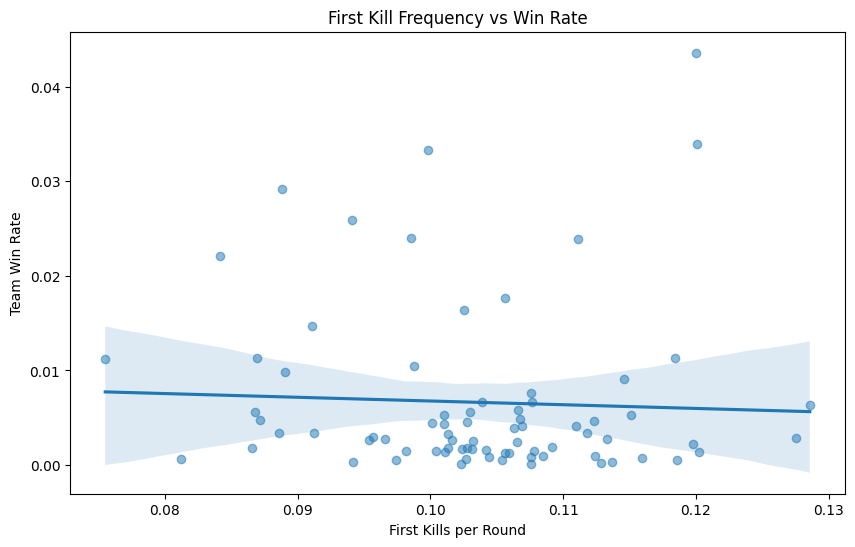

In [26]:
# Calculate first kill impact
fk_impact = players_df.groupby('current_team').agg(
    total_first_kills=('total_opening_kills', 'sum'),
    total_rounds=('rounds_played', 'sum')
).reset_index()

# Merge with match wins
fk_impact = pd.merge(fk_impact,
                    matches_df.groupby('winningTeam')['roundNum'].count().reset_index(name='wins'),
                    left_on='current_team',
                    right_on='winningTeam')

# Calculate correlations
fk_impact['fk_per_round'] = fk_impact['total_first_kills'] / fk_impact['total_rounds']
fk_impact['win_rate'] = fk_impact['wins'] / fk_impact['total_rounds']

plt.figure(figsize=(10,6))
sns.regplot(x='fk_per_round', y='win_rate', data=fk_impact, scatter_kws={'alpha':0.5})
plt.title('First Kill Frequency vs Win Rate')
plt.xlabel('First Kills per Round')
plt.ylabel('Team Win Rate')
plt.show()

Economy

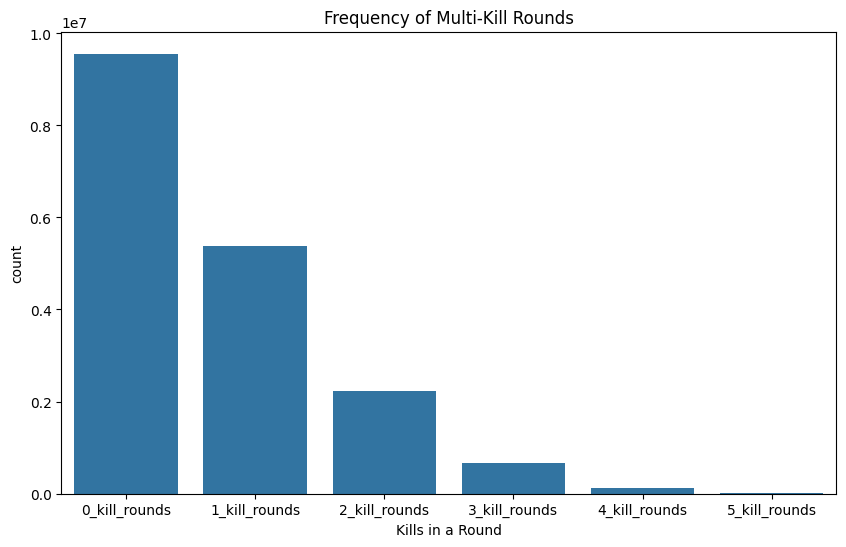

In [35]:
kill_cols = [f'{i}_kill_rounds' for i in range(6)]
kill_dist = players_df[kill_cols].sum().reset_index()
kill_dist.columns = ['kills', 'count']

plt.figure(figsize=(10,6))
sns.barplot(x='kills', y='count', data=kill_dist)
plt.title('Frequency of Multi-Kill Rounds')
plt.xlabel('Kills in a Round')
plt.show()

1. Team Synergy: Assist/Save Ratio vs Win Rate
**bold text**

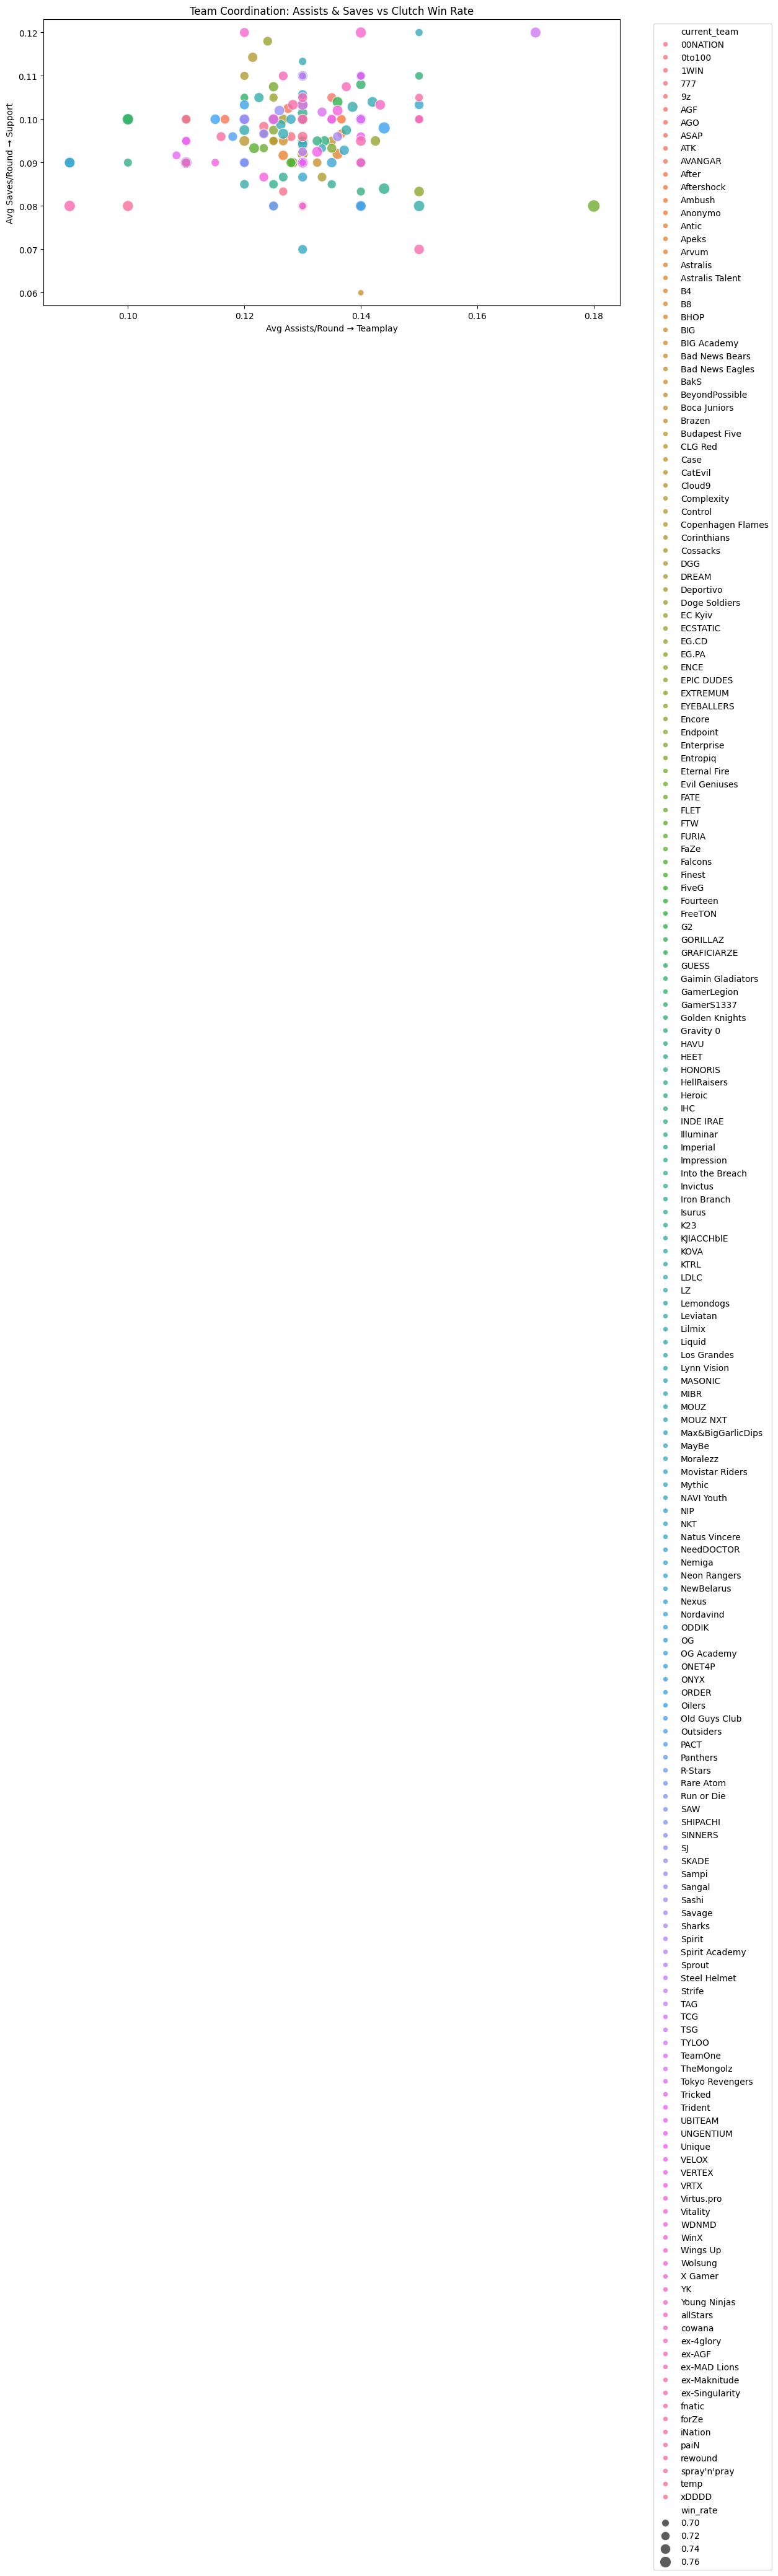

In [37]:
# Clean percentage columns and convert to float
players_df['team_win_percent_after_first_kill'] = (
    players_df['team_win_percent_after_first_kill']
    .str.replace('%', '')
    .astype(float) / 100
)

# Verify numeric columns
players_df['assists_per_round'] = pd.to_numeric(players_df['assists_per_round'], errors='coerce')
players_df['saved_teammates_per_round'] = pd.to_numeric(players_df['saved_teammates_per_round'], errors='coerce')

# Calculate team synergy stats
team_synergy = players_df.groupby('current_team').agg(
    avg_assists=('assists_per_round', 'mean'),
    avg_saves=('saved_teammates_per_round', 'mean'),
    win_rate=('team_win_percent_after_first_kill', 'mean')
).reset_index().dropna()

# Plot
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='avg_assists',
    y='avg_saves',
    size='win_rate',
    hue='current_team',
    data=team_synergy,
    sizes=(50, 200),
    alpha=0.8
)
plt.title('Team Coordination: Assists & Saves vs Clutch Win Rate')
plt.xlabel('Avg Assists/Round → Teamplay')
plt.ylabel('Avg Saves/Round → Support')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [4]:
# Dataset summary
players_df.info()

# Descriptive statistics
players_df.describe()

# Check for missing values
players_df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   player_id                          811 non-null    int64  
 1   nickname                           811 non-null    object 
 2   real_name                          811 non-null    object 
 3   age                                811 non-null    int64  
 4   country                            811 non-null    object 
 5   current_team                       514 non-null    object 
 6   teams                              811 non-null    object 
 7   total_kills                        811 non-null    int64  
 8   total_deaths                       811 non-null    int64  
 9   headshot_percentage                811 non-null    object 
 10  damage_per_round                   811 non-null    float64
 11  grenade_dmg_per_round              811 non-null    float64

player_id                              0
nickname                               0
real_name                              0
age                                    0
country                                0
current_team                         297
teams                                  0
total_kills                            0
total_deaths                           0
headshot_percentage                    0
damage_per_round                       0
grenade_dmg_per_round                  0
maps_played                            0
rounds_played                          0
kills_per_death                        0
kills_per_round                        0
assists_per_round                      0
deaths_per_round                       0
saved_by_teammate_per_round            0
saved_teammates_per_round              0
rounds_with_kills                      0
kill_to_death_diff                     0
total_opening_kills                    0
total_opening_deaths                   0
opening_kill_rat

In [8]:
print(players_df.columns)


Index(['player_id', 'nickname', 'real_name', 'age', 'country', 'current_team',
       'teams', 'total_kills', 'total_deaths', 'headshot_percentage',
       'damage_per_round', 'grenade_dmg_per_round', 'maps_played',
       'rounds_played', 'kills_per_death', 'kills_per_round',
       'assists_per_round', 'deaths_per_round', 'saved_by_teammate_per_round',
       'saved_teammates_per_round', 'rounds_with_kills', 'kill_to_death_diff',
       'total_opening_kills', 'total_opening_deaths', 'opening_kill_ratio',
       'opening_kill_rating', 'team_win_percent_after_first_kill',
       'first_kill_in_won_rounds', '0_kill_rounds', '1_kill_rounds',
       '2_kill_rounds', '3_kill_rounds', '4_kill_rounds', '5_kill_rounds',
       'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills',
       'grenade_kills', 'other_kills', 'rating'],
      dtype='object')


In [9]:
players_df.info()
players_df.describe()
players_df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   player_id                          811 non-null    int64  
 1   nickname                           811 non-null    object 
 2   real_name                          811 non-null    object 
 3   age                                811 non-null    int64  
 4   country                            811 non-null    object 
 5   current_team                       514 non-null    object 
 6   teams                              811 non-null    object 
 7   total_kills                        811 non-null    int64  
 8   total_deaths                       811 non-null    int64  
 9   headshot_percentage                811 non-null    object 
 10  damage_per_round                   811 non-null    float64
 11  grenade_dmg_per_round              811 non-null    float64

player_id                              0
nickname                               0
real_name                              0
age                                    0
country                                0
current_team                         297
teams                                  0
total_kills                            0
total_deaths                           0
headshot_percentage                    0
damage_per_round                       0
grenade_dmg_per_round                  0
maps_played                            0
rounds_played                          0
kills_per_death                        0
kills_per_round                        0
assists_per_round                      0
deaths_per_round                       0
saved_by_teammate_per_round            0
saved_teammates_per_round              0
rounds_with_kills                      0
kill_to_death_diff                     0
total_opening_kills                    0
total_opening_deaths                   0
opening_kill_rat

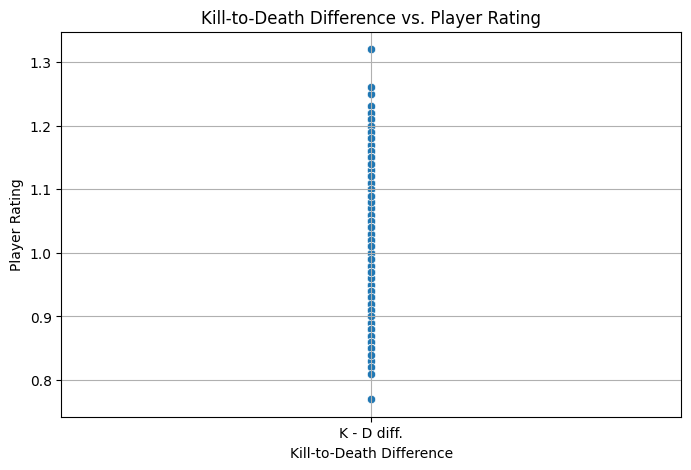

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kill-to-death difference vs. rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=players_df, x='kill_to_death_diff', y='rating')
plt.title('Kill-to-Death Difference vs. Player Rating')
plt.xlabel('Kill-to-Death Difference')
plt.ylabel('Player Rating')
plt.grid(True)
plt.show()



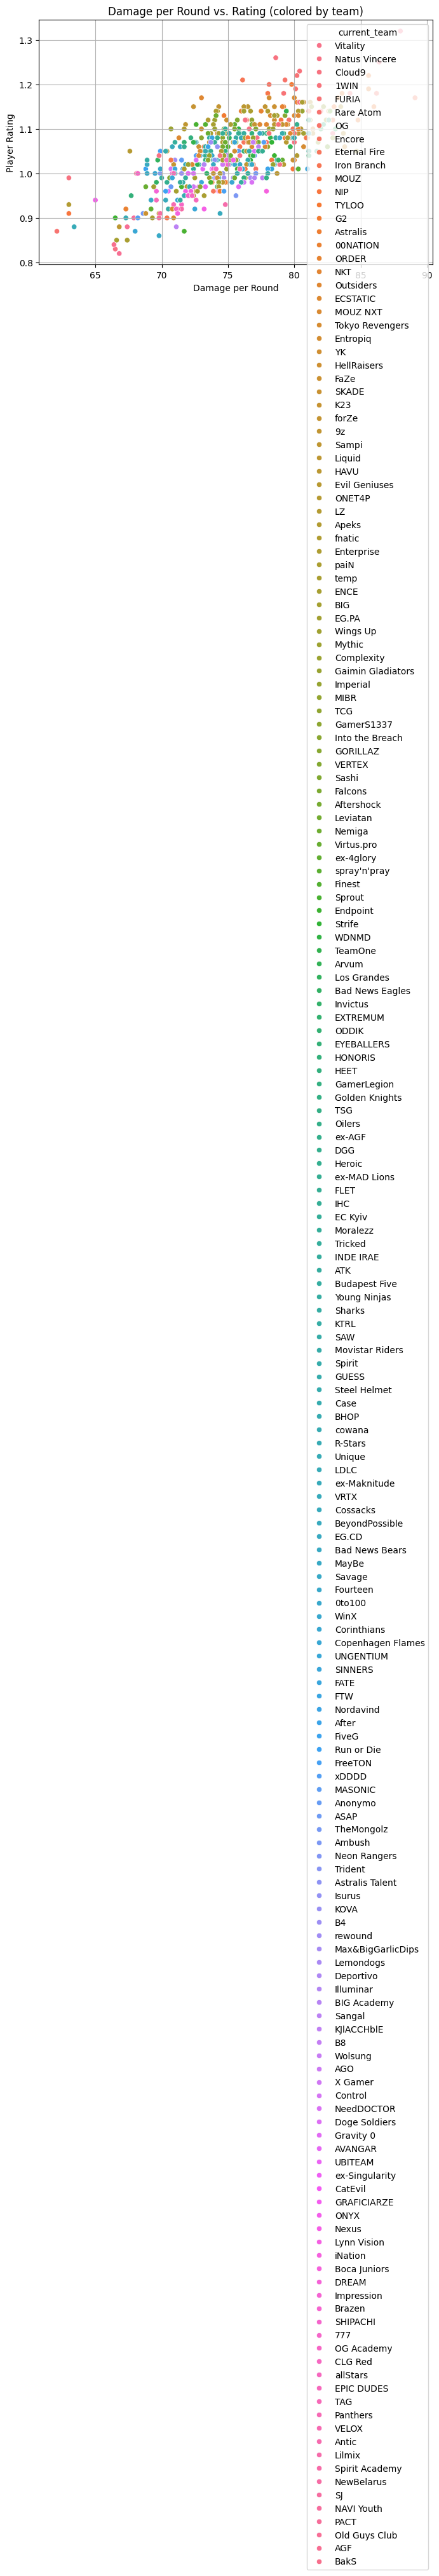

In [13]:
# Damage per round vs. rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=players_df, x='damage_per_round', y='rating', hue='current_team')
plt.title('Damage per Round vs. Rating (colored by team)')
plt.xlabel('Damage per Round')
plt.ylabel('Player Rating')
plt.grid(True)
plt.show()


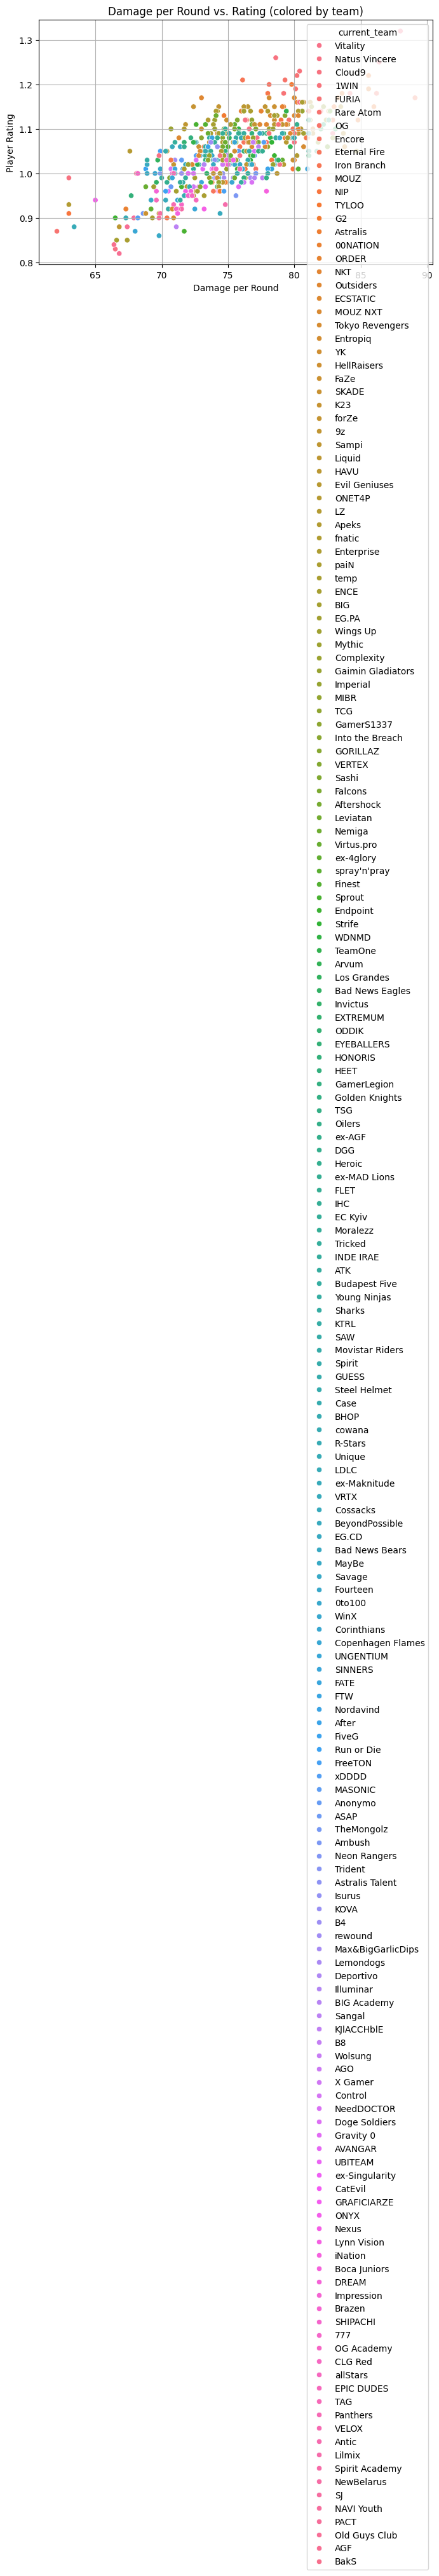

In [14]:
# Damage per round vs. rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=players_df, x='damage_per_round', y='rating', hue='current_team')
plt.title('Damage per Round vs. Rating (colored by team)')
plt.xlabel('Damage per Round')
plt.ylabel('Player Rating')
plt.grid(True)
plt.show()



## Python Packages Used

- `pandas`: For data loading, wrangling, and grouping.
- `matplotlib.pyplot`: For standard plotting.
- `seaborn`: For enhanced statistical visualizations with color-coded groupings.

### Advanced Feature
We used `seaborn` to generate a multi-variable scatterplot that highlights team differences in performance using color (hue) separation.



## Conclusion

- A clear pattern was found between average team rating and round success, especially when teams maintained ratings above 1.0.
- The economy variable (money) also correlated with higher success, emphasizing the importance of saving/spending strategy.

## Insights and Future Use
- This analysis can help identify high-impact rounds, optimal money usage, and potential team weaknesses.
- Further studies could incorporate map metadata, enemy stats, and role-based breakdowns to build predictive win models.


In [ ]:

# Top 10 Players by Average Rating
top_players = players_df.groupby('player_name')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_players.plot(kind='barh')
plt.title('Top 10 Players by Average Rating')
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

# Team-wise Wins
if 'team' in players_df.columns and 'match_id' in players_df.columns:
    team_wins = players_df.groupby('team')['match_id'].nunique().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    team_wins.plot(kind='bar')
    plt.title('Number of Matches Played by Each Team')
    plt.ylabel('Match Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:

# Heatmap of Player Stats Correlation
numeric_cols = players_df.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Player Stats')
plt.tight_layout()
plt.show()


In [ ]:

# Match Frequency Over Time
if 'date' in players_df.columns:
    players_df['date'] = pd.to_datetime(players_df['date'], errors='coerce')
    matches_per_month = players_df.groupby(players_df['date'].dt.to_period('M'))['match_id'].nunique()
    matches_per_month.index = matches_per_month.index.to_timestamp()
    matches_per_month.plot(figsize=(12,6))
    plt.title('Match Frequency Over Time')
    plt.ylabel('Number of Matches')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:

# Radar Chart to Compare Two Players
import numpy as np

def radar_chart(player1, player2, stats_cols):
    data = players_df[players_df['player_name'].isin([player1, player2])]
    grouped = data.groupby('player_name')[stats_cols].mean()
    
    categories = stats_cols
    N = len(categories)

    values1 = grouped.loc[player1].values.flatten().tolist()
    values2 = grouped.loc[player2].values.flatten().tolist()
    
    values1 += values1[:1]
    values2 += values2[:1]
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)

    ax.plot(angles, values1, linewidth=2, linestyle='solid', label=player1)
    ax.fill(angles, values1, alpha=0.25)

    ax.plot(angles, values2, linewidth=2, linestyle='solid', label=player2)
    ax.fill(angles, values2, alpha=0.25)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(f'Comparison: {player1} vs {player2}')
    plt.show()

# Example usage (change player names and columns accordingly)
# radar_chart('PlayerA', 'PlayerB', ['rating', 'kills', 'deaths', 'kast', 'adr'])
